In [128]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [129]:
archivo=open("DataRotacion.csv")
leer= pd.read_csv(archivo,sep=",")
print(leer)

        h  angle       y  sigmay
0    10.0   10.0  0.0017  0.0015
1    20.0   10.0  0.0016  0.0015
2    30.0   10.0  0.0027  0.0015
3    40.0   10.0  0.0055  0.0015
4    50.0   10.0  0.0083  0.0015
5    60.0   10.0  0.0085  0.0015
6    70.0   10.0  0.0096  0.0015
7    80.0   10.0  0.0144  0.0015
8    90.0   10.0  0.0200  0.0015
9   100.0   10.0  0.0208  0.0015
10   10.0   20.0  0.0007  0.0015
11   20.0   20.0  0.0016  0.0015
12   30.0   20.0  0.0030  0.0015
13   40.0   20.0  0.0043  0.0015
14   50.0   20.0  0.0078  0.0015
15   60.0   20.0  0.0092  0.0015
16   70.0   20.0  0.0106  0.0015
17   80.0   20.0  0.0142  0.0015
18   90.0   20.0  0.0181  0.0015
19  100.0   20.0  0.0210  0.0015
20   10.0   30.0  0.0013  0.0015
21   20.0   30.0  0.0017  0.0015
22   30.0   30.0  0.0038  0.0015
23   40.0   30.0  0.0059  0.0015
24   50.0   30.0  0.0067  0.0015
25   60.0   30.0  0.0094  0.0015
26   70.0   30.0  0.0122  0.0015
27   80.0   30.0  0.0132  0.0015
28   90.0   30.0  0.0151  0.0015
29  100.0 

In [130]:
datos_30=leer[leer["angle"]==30]
print(datos_30)

        h  angle       y  sigmay
20   10.0   30.0  0.0013  0.0015
21   20.0   30.0  0.0017  0.0015
22   30.0   30.0  0.0038  0.0015
23   40.0   30.0  0.0059  0.0015
24   50.0   30.0  0.0067  0.0015
25   60.0   30.0  0.0094  0.0015
26   70.0   30.0  0.0122  0.0015
27   80.0   30.0  0.0132  0.0015
28   90.0   30.0  0.0151  0.0015
29  100.0   30.0  0.0186  0.0015


In [131]:
def desviacion_de_coriolis(h, omega, lambda_, g):
    deviation = ((2*np.sqrt(2)) / 3 ) * omega * np.cos(np.deg2rad(lambda_)) * (((h ** 3) /g)**(1/2))
    return deviation


In [132]:
def x2(omega, h, y, sigmay, angle, g):
    deviation = desviacion_de_coriolis(h, omega, angle, g)
    total = y- deviation
    x2 = np.sum((total)**2 / (2*sigmay** 2))
    return x2

In [133]:
h = np.float64(datos_30["h"])
y = np.float64(datos_30["y"])
sigmay = np.float64(datos_30["sigmay"])
angle = 30
g = 9.81
omega_inicial = 1e-4


resultado = optimize.minimize(x2, omega_inicial, args=(h, y, sigmay, angle, g))


omega_estimado = resultado.x[0]

print("Valor estimado de la velocidad angular:")
print(omega_estimado)

Valor estimado de la velocidad angular:
7.243998152757606e-05


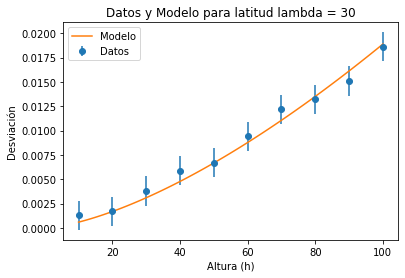

In [137]:
h_model = np.linspace(min(h), max(h), 100)

desviacion = desviacion_de_coriolis(h_model, omega_estimado, angle, g)

fig, ax = plt.subplots()

ax.errorbar(h, y, yerr=sigmay, fmt='o', label='Datos')


ax.plot(h_model, desviacion, label='Modelo')

ax.set_xlabel('Altura (h)')
ax.set_ylabel('Desviación')

ax.set_title('Datos y Modelo para latitud lambda = 30')

ax.legend()

plt.show()

In [ ]:
#Parte 2

In [ ]:
#Los puntos a,b,c,d,e se hacen en la siguinete parte juntos

In [168]:
N=300
Gravedad = []
Omega = []

for i in range(N):

    g_remuestreado = 9.81 + np.random.normal(loc=0, scale=1)
    
    Gravedad.append(g_remuestreado)

    puntos_modificados = y + np.random.normal(loc=0, scale=sigmay[0], size=len(y))

    resultado = optimize.minimize(chi_squared, x0=[7e-5], args=(h, puntos_modificados, sigmay, angle, g_remuestreado))

    omega_estimado = resultado.x[0]

    Omega.append(omega_estimado)

In [ ]:
#Punto F

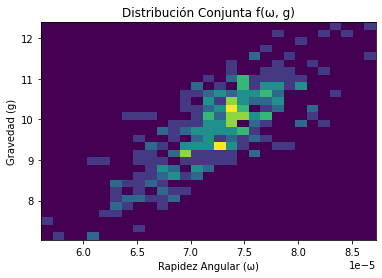

Número de cuadros en la figura: 841


In [169]:
binsx = np.linspace(np.min(Omega), np.max(Omega), 30)
binsy = np.linspace(np.min(Gravedad), np.max(Gravedad), 30)

H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(binsx, binsy))

plt.imshow(H2.T, origin='lower', aspect='auto', extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]])
plt.xlabel('Rapidez Angular (ω)')
plt.ylabel('Gravedad (g)')
plt.title('Distribución Conjunta f(ω, g)')
plt.show()
num_cuadros = H2.size
print("Número de cuadros en la figura:", num_cuadros)

In [170]:
#Los cambios en el valor de la gravedad están relacionados con los cambios en el valor 
#de omega. Si uno de ellos aumenta, es probable que el otro también aumente, y si uno 
#disminuye, es probable que el otro también disminuya. Esto sugiere una relación lineal 
#entre el valor de la gravedad y el omega, por lo que podemos decir que existe una 
#correlación entre estas. 

In [171]:
H1 = np.sum(H2, axis=1)
print(H1)

[ 1.  1.  0.  0.  3.  2.  7.  5. 10. 10. 14. 13. 17. 21. 28. 25. 37. 29.
 19. 19. 15.  5.  7.  4.  3.  2.  1.  0.  2.]


In [172]:
cs = np.cumsum(H1)
ij = np.searchsorted(cs, np.percentile(cs, 16))
ii = np.searchsorted(cs, np.percentile(cs, 50))
ji = np.searchsorted(cs, np.percentile(cs, 84))

print(cs)
print(ij)
print(ii)
print(ji)

[  1.   2.   2.   2.   5.   7.  14.  19.  29.  39.  53.  66.  83. 104.
 132. 157. 194. 223. 242. 261. 276. 281. 288. 292. 295. 297. 298. 298.
 300.]
5
14
24
